
## Problem 2.2 - Explore the $\theta$-rule for exponential growth

This exercise asks you to solve the ODE $u'=-au$ with $a < 0$ such that
the ODE models exponential growth instead of exponential decay.  A
central theme is to investigate numerical artifacts and non-physical
solution behavior.

1) Set $a=-1$ and run experiments with $\theta=0, 0.5, 1$ for various values of $\Delta t$ to uncover numerical artifacts. Recall that the exact solution is a monotone, growing function when $a < 0$. Oscillations or significantly wrong growth are signs of wrong qualitative behavior.

From the experiments, select four values of $\Delta t$ that
demonstrate the kind of numerical solutions that are characteristic
for this model.

2) Write up the amplification factor and plot it for $\theta=0,0.5,1$ together with the exact one for $a\Delta t < 0$. Use the plot to explain the observations made in the experiments.

Hint: [decay_ampf_plot.py](https://github.com/hplgit/decay-book/blob/master/src/analysis/decay_ampf_plot.py)

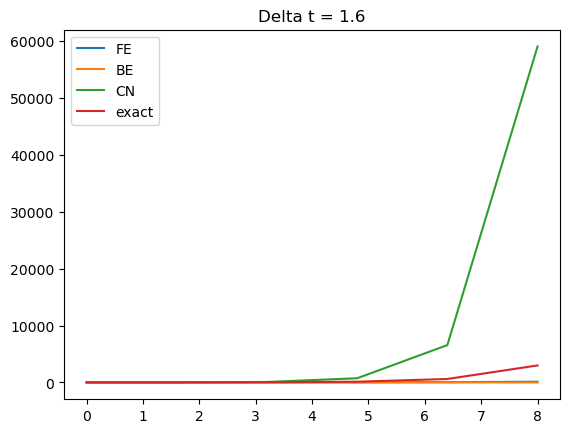

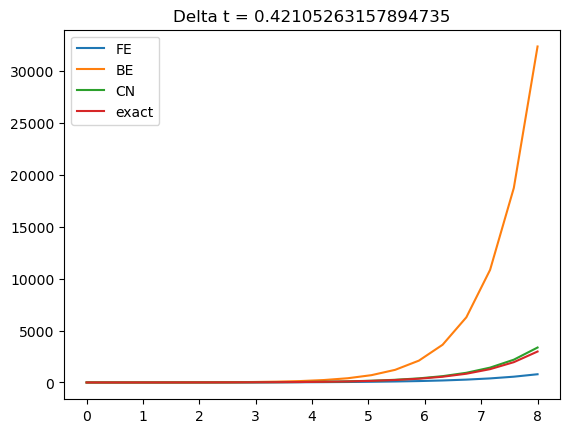

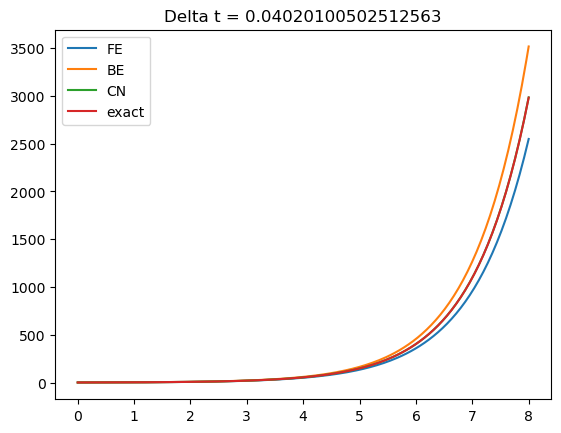

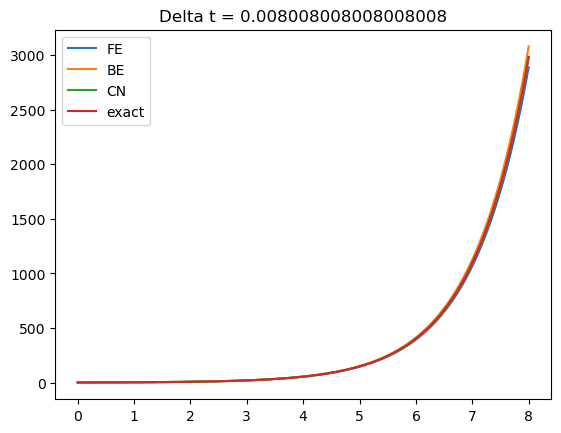

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def A_exact(p):
    return np.exp(-p)

def A(p, theta):
    return (1-(1-theta)*p)/(1+theta*p)

def exp_plot(a, t, delta_t):
    """
    Plots the amplification factor together with the exact solution for
    three different values of theta over the interval t.
    """
    name2theta = dict(FE=0, BE=1, CN=0.5)    
    sol = np.zeros(len(t))

    for name in name2theta.keys():
        A_val = A(a*delta_t, name2theta[name])
        #plots the numerical approximation
        for n in range(len(t)):
            sol[n] = A_val**n
        plt.plot(t, sol, label=name)

    #plots the exact factor
    plt.plot(t, A_exact(a*t), label="exact")
    plt.legend()
    plt.title(f"Delta t = {delta_t}")
    plt.show()


if __name__ == "__main__":
    a = -1
    numb_steps = [6, 20, 200, 1000]

    for j in numb_steps:
        t = np.linspace(0, 8, j)
        delta_t = t[1] - t[0]
        exp_plot(a, t, delta_t)

This code creates four plots for four different values of delta_t. The code begins by defining two functions, one for the exact solution, A_exact, and one for the numerical approximation, A. The longer function following these two approximates A using Backward Euler, Forward Euler, and Cranck-Nicolson, representet by the three different values of theta. The function then plots the different approximations for each delta_t separately together with the exact solution.

In the code below the function we then run the exp_plot function for t values between 0 and 8, with 6, 20, 200, and 1000 timesteps, giving us the delta_t values seen in the titles of the plots. In the plots we can see that smaller delta_t gives better approximations for all three methods. We can also see that for very big timesteps, like in the first two plots, some of the methods becomes very wrong. This can be seen with for example the Crank-Nicolson method in the first plot, which only had 6 steps.